In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict , cross_val_score
import scikitplot as skplt

In [6]:
X, y = load_digits(return_X_y=True)
random_forest_clf = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=1)

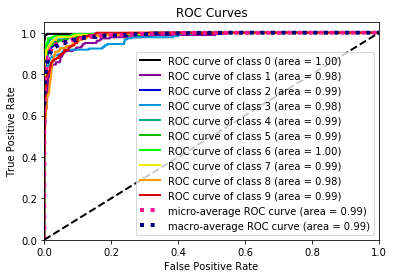

In [35]:
rf = random_forest_clf.fit(X, y)
y_probas = rf.predict_proba(X)
skplt.metrics.plot_roc(y, y_probas)
plt.show()

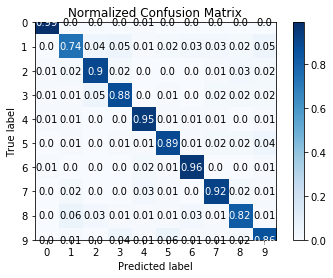

In [37]:
predictions = rf.predict(X)
skplt.metrics.plot_confusion_matrix(y, predictions,
                                    normalize=True)
plt.show()

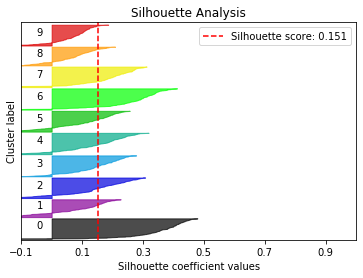

In [38]:
skplt.metrics.plot_silhouette(X, predictions)

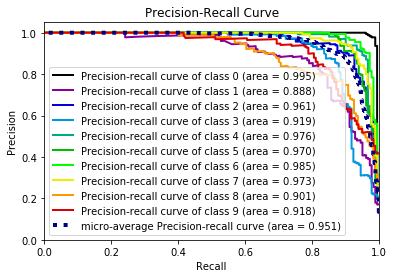

In [36]:
skplt.metrics.plot_precision_recall(y, y_probas)
plt.show()

In [44]:
zero_one_index = [True if i in [0,1] else False for i in y  ]

In [45]:
X_1 , Y_1 = X[zero_one_index] , y[zero_one_index]

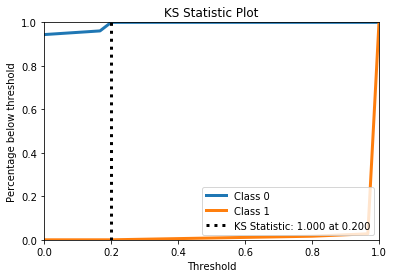

In [46]:
rf = random_forest_clf.fit(X_1 , Y_1)
y_probas = rf.predict_proba(X_1)
skplt.metrics.plot_ks_statistic(Y_1, y_probas)
plt.show()

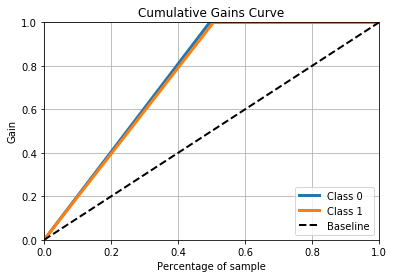

In [47]:
skplt.metrics.plot_cumulative_gain(Y_1, y_probas)
plt.show()

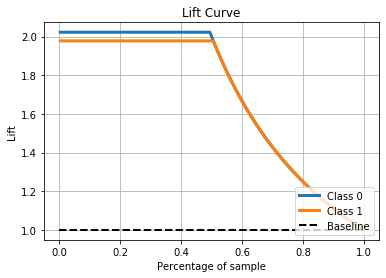

In [49]:
skplt.metrics.plot_lift_curve(Y_1, y_probas)
plt.show()

/root/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


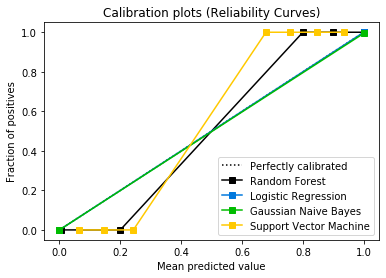

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
rf = RandomForestClassifier()
lr = LogisticRegression()
nb = GaussianNB()
svm = LinearSVC()
rf_probas = rf.fit(X_1, Y_1).predict_proba(X_1)
lr_probas = lr.fit(X_1, Y_1).predict_proba(X_1)
nb_probas = nb.fit(X_1, Y_1).predict_proba(X_1)
svm_scores = svm.fit(X_1, Y_1).decision_function(X_1)
probas_list = [rf_probas, lr_probas, nb_probas, svm_scores]
clf_names = ['Random Forest', 'Logistic Regression',
             'Gaussian Naive Bayes', 'Support Vector Machine']
skplt.metrics.plot_calibration_curve(Y_1,
                                     probas_list,
                                     clf_names)

plt.show()

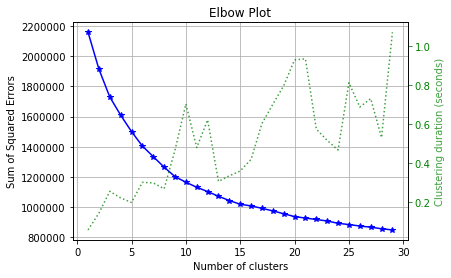

In [54]:
from sklearn.cluster import KMeans
kmeans= KMeans(random_state=1)
skplt.cluster.plot_elbow_curve(kmeans, X,
                               cluster_ranges=range(1, 30))
plt.show()

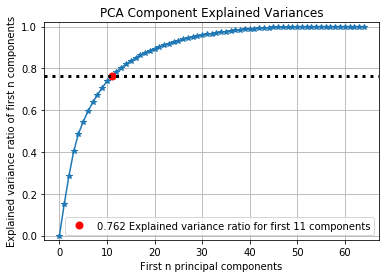

In [51]:
import scikitplot as skplt
from sklearn.decomposition import PCA
pca = PCA(random_state=1)
pca.fit(X)
skplt.decomposition.plot_pca_component_variance(pca)
plt.show()

In [55]:
skplt.__version__

'0.3.7'